In [1]:
import numpy as np
import pandas as pd

# import data

In [2]:
df = pd.read_csv('data/customer.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Tentukan jumlah cluster

k-modes & k-means = k-prototype

  0%|          | 0/8 [00:00<?, ?it/s]

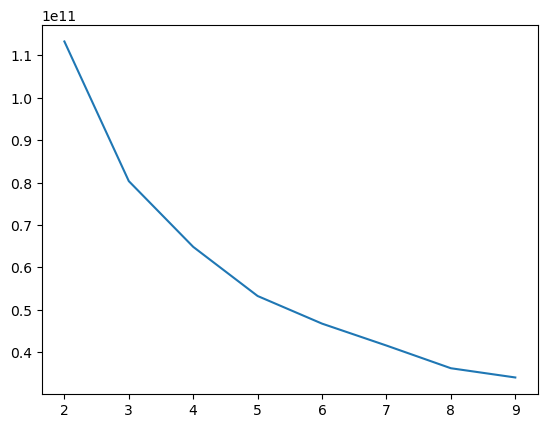

In [ ]:
from kmodes.kprototypes import KPrototypes
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

score = []
for k in tqdm(range(2, 10)):
    model = KPrototypes(n_clusters=k)
    # harus didefinisikan mana kolom kategori dan numerik dikasus ini kmodes hanya perlu mendefinisikan kolom kategori yang lain dianggap numerik
    model.fit(df, categorical=[0, 1]) 
    score.append(model.cost_)

plt.plot(range(2, 10), score)

# training

In [22]:
model = KPrototypes(n_clusters=3)
member = model.fit_predict(df, categorical=[0, 1])

In [23]:
df_pred = df.copy()
df_pred['cluster'] = member
df_pred.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,2


# analyze cluster

In [29]:
centroids = model.cluster_centroids_

num_centroids = centroids[:, 2:]  # Untuk kolom numerikal
cat_centroids = centroids[:, :2]  # Untuk kolom kategorikal


df_cat = pd.DataFrame(cat_centroids, columns=df.columns[:2])
df_num = pd.DataFrame(num_centroids, columns=df.columns[2:])
df_ = df_cat.join(df_num)
df_

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8027.411765,18375.921569,27342.549020,2014.313725,12314.607843,2233.254902,2.0,3.0
1,8249.996960,3800.966565,5248.556231,2571.677812,1755.112462,1137.018237,1.0,3.0
2,35941.400000,6044.450000,6288.616667,6713.966667,1039.666667,3049.466667,1.0,3.0


In [31]:
# Mengakses cluster_centroids_
centroids = model.cluster_centroids_

# Tentukan jumlah kolom kategorikal (kolom 0 dan 1 adalah kategorikal)
num_cat_cols = 2  # karena kolom kategorikal ada di kolom pertama dan kedua

# Pisahkan centroid kategorikal dan numerik
cat_centroids = centroids[:, :num_cat_cols]  # Ambil 2 kolom pertama untuk kategorikal
num_centroids = centroids[:, num_cat_cols:]  # Sisanya adalah numerik

# Membuat DataFrame untuk centroid kategorikal dan numerik
df_cat_centroids = pd.DataFrame(cat_centroids, columns=df.columns[:num_cat_cols])  # Kolom pertama dan kedua untuk kategorikal
df_num_centroids = pd.DataFrame(num_centroids, columns=df.columns[num_cat_cols:])  # Sisanya untuk numerik

# Gabungkan centroid kategorikal dan numerik
df_centroids = pd.concat([df_cat_centroids, df_num_centroids], axis=1)

# Tampilkan hasilnya
print(df_centroids)

        Channel        Region         Fresh         Milk       Grocery  \
0   8027.411765  18375.921569  27342.549020  2014.313725  12314.607843   
1   8249.996960   3800.966565   5248.556231  2571.677812   1755.112462   
2  35941.400000   6044.450000   6288.616667  6713.966667   1039.666667   

        Frozen  Detergents_Paper  Delicassen  
0  2233.254902               2.0         3.0  
1  1137.018237               1.0         3.0  
2  3049.466667               1.0         3.0  
